In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Moving Average Smoothing
- smoothing = remove noise  and better expose the signal
- moving average requires a specific window size (window width)
- Centered Moving Average
	+ requires knowledge of future values
	+ analysis to better understand the dataset
	+ remove
        - trend(long-term increasing or decreasing movement) 
        - seasonal components(consistent periodic structure)
	+ eg: window size = 3
	$$cma(t) = mean(obs(t − 1),obs(t),obs(t + 1))$$
- Trailing Moving Average
	+ only uses historical observations and is used on time series forecasting
	+ eg: window size = 3
	$$tma(t) = mean(obs(t − 2),obs(t − 1),obs(t))$$

In [2]:
series = pd.read_csv(
    './data/daily-total-female-births.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    squeeze=True)

series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [3]:
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()

rolling_mean.head(10)

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64

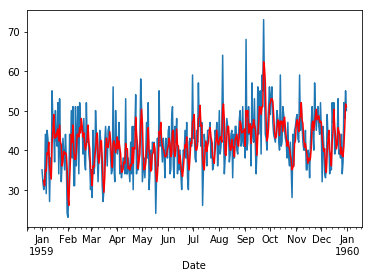

In [4]:
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')

plt.show()

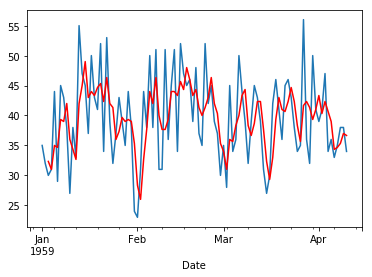

In [5]:
# zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')

plt.show()

## Moving Average as Feature Engineering

In [6]:
df = pd.DataFrame(series.values)

width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)

# mean = mean(t-2, t-1, t)
means = window.mean()
df = pd.concat([means, lag1, df], axis=1)
df.columns = ['mean', 't', 't+1']

df.head(10)

,mean,t,t+1
0,NaN,NaN,35
1,NaN,35.0,32
2,NaN,32.0,30
3,NaN,30.0,31
4,32.333333,31.0,44
5,31.000000,44.0,29
6,35.000000,29.0,45
7,34.666667,45.0,43
8,39.333333,43.0,38
9,39.000000,38.0,27


## Moving Average as Prediction
- A naive model
- assumes that the trend and seasonality components of the time series have already been removed or adjusted

In [7]:
# prepare situation
X = series.values

window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    y_hat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    
    predictions.append(y_hat)
    history.append(obs)
    print('predicted=%f, real_val=%f' % (y_hat, obs))

predicted=32.333333, real_val=31.000000
predicted=31.000000, real_val=44.000000
predicted=35.000000, real_val=29.000000
predicted=34.666667, real_val=45.000000
predicted=39.333333, real_val=43.000000
predicted=39.000000, real_val=38.000000
predicted=42.000000, real_val=27.000000
predicted=36.000000, real_val=38.000000
predicted=34.333333, real_val=33.000000
predicted=32.666667, real_val=55.000000
predicted=42.000000, real_val=47.000000
predicted=45.000000, real_val=45.000000
predicted=49.000000, real_val=37.000000
predicted=43.000000, real_val=50.000000
predicted=44.000000, real_val=43.000000
predicted=43.333333, real_val=41.000000
predicted=44.666667, real_val=52.000000
predicted=45.333333, real_val=34.000000
predicted=42.333333, real_val=53.000000
predicted=46.333333, real_val=39.000000
predicted=42.000000, real_val=32.000000
predicted=41.333333, real_val=37.000000
predicted=36.000000, real_val=43.000000
predicted=37.333333, real_val=39.000000
predicted=39.666667, real_val=35.000000


In [8]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.834


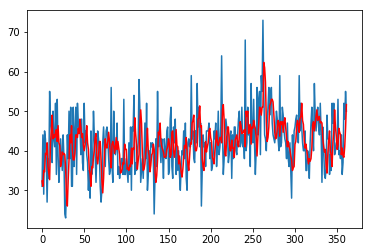

In [9]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

plt.show()

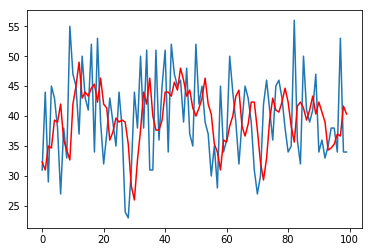

In [10]:
# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')

plt.show()